In [15]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib import style
import plotly.express as px

In [16]:
path = "C:\\Users\\Aayush\\Desktop\\Data_Products\\Data_Products.csv"

In [17]:
df=pd.read_csv(path)

In [18]:
# tickers=['AMZN','AAPL']
# start='2023-01-01'
# end='2024-01-01'
# scenarios= 1000
# returns = pd.DataFrame()

# for ticker in tickers:
#     data=web.DataReader(ticker,'yahoo',start,end)
#     data=pd.DataFrame(data)
#     data[ticker]= data['Adj Close'].pct_change()
    
#     if returns.empty:
#         returns = data[[ticker]]
#     else:
#         returns= returns.join(data[[ticker]],how='outer')

import pandas as pd
import yfinance as yf

tickers = ['AMZN', 'AAPL','TSLA','MSFT','GOOGL','NVDA']
start = '2023-01-01'
end = '2024-01-01'
scenarios= 100000
returns = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start, end=end)
    data[ticker] = data['Adj Close'].pct_change()

    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how='outer')
        
returns = pd.DataFrame(returns)        

returns.head()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AMZN,AAPL,TSLA,MSFT,GOOGL,NVDA
Date,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,-0.007924,0.010314,0.051249,-0.043743,-0.011670,0.030318
2023-01-05,-0.023726,-0.010605,-0.029039,-0.029638,-0.021344,-0.032816
2023-01-06,0.035611,0.036794,0.024651,0.011785,0.013225,0.041640
2023-01-09,0.014870,0.004089,0.059349,0.009736,0.007786,0.051753


In [19]:
df.head()

,Date,GFIF,CAR,MSAR,EQAR,SE,EVE
0,23-01-2023,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,24-01-2023,0.0053,0.0078,0.0068,-0.0045,0.0040,0.0024
2,25-01-2023,-0.0007,-0.0003,0.0024,-0.0034,-0.0096,-0.0033
3,26-01-2023,0.0021,-0.0018,0.0065,-0.0103,0.0049,-0.0093
4,27-01-2023,0.0011,0.0020,-0.0038,0.0017,0.0069,-0.0077


In [20]:
returns['AMZN']=df['GFIF'].values
returns['AAPL']=df['CAR'].values
returns['TSLA']=df['MSAR'].values
returns['MSFT']=df['EQAR'].values
returns['GOOGL']=df['SE'].values
returns['NVDA']=df['EVE'].values


In [21]:
returns.head()

,AMZN,AAPL,TSLA,MSFT,GOOGL,NVDA
Date,,,,,,
2023-01-03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2023-01-04,0.0053,0.0078,0.0068,-0.0045,0.0040,0.0024
2023-01-05,-0.0007,-0.0003,0.0024,-0.0034,-0.0096,-0.0033
2023-01-06,0.0021,-0.0018,0.0065,-0.0103,0.0049,-0.0093
2023-01-09,0.0011,0.0020,-0.0038,0.0017,0.0069,-0.0077


In [22]:
returns['AMZN']=pd.to_numeric(returns['AMZN'])
returns['AAPL']=pd.to_numeric(returns['AAPL'])
returns['TSLA']=pd.to_numeric(returns['TSLA'])
returns['NVDA']=pd.to_numeric(returns['NVDA'])
returns['MSFT']=pd.to_numeric(returns['MSFT'])
returns['GOOGL']=pd.to_numeric(returns['GOOGL'])


# AMZN= GFIF AAPL=CAR TSLA=MSAR MSFT=EQAR GOOGL=SE NVDA=EVE

In [23]:
len(returns)

250

In [24]:
df

,Date,GFIF,CAR,MSAR,EQAR,SE,EVE
0,23-01-2023,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,24-01-2023,0.0053,0.0078,0.0068,-0.0045,0.0040,0.0024
2,25-01-2023,-0.0007,-0.0003,0.0024,-0.0034,-0.0096,-0.0033
3,26-01-2023,0.0021,-0.0018,0.0065,-0.0103,0.0049,-0.0093
4,27-01-2023,0.0011,0.0020,-0.0038,0.0017,0.0069,-0.0077
...,...,...,...,...,...,...,...
245,27-09-2023,0.0010,0.0083,0.0010,0.0103,0.0014,0.0091
246,28-09-2023,0.0139,0.0204,0.0004,0.0128,-0.0023,-0.0157
247,29-09-2023,0.0105,-0.0138,0.0066,-0.0191,0.0035,0.0093
248,30-09-2023,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001


In [25]:
returns.head()

,AMZN,AAPL,TSLA,MSFT,GOOGL,NVDA
Date,,,,,,
2023-01-03,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2023-01-04,0.0053,0.0078,0.0068,-0.0045,0.0040,0.0024
2023-01-05,-0.0007,-0.0003,0.0024,-0.0034,-0.0096,-0.0033
2023-01-06,0.0021,-0.0018,0.0065,-0.0103,0.0049,-0.0093
2023-01-09,0.0011,0.0020,-0.0038,0.0017,0.0069,-0.0077


In [26]:
portfolio_returns=[]
# tickers = ['GFIF', 'CAR','MSAR','EQAR','SE','EVE']
sharpe_ratio=[]
risk=[]
portfolio_weights=[]
risk_free_rate=7/100
for scenario in range(scenarios):
    weights=np.random.random_sample(len(tickers))
    weights= np.round(weights/np.sum(weights),2)
    portfolio_weights.append(weights)

    annual_returns=np.sum(returns.mean()*weights)*252
    portfolio_returns.append(annual_returns)
    
    matrix_cov= returns.cov()*252
    variance=np.dot(weights.T,np.dot(matrix_cov,weights))
    sd=np.sqrt(variance)
    risk.append(sd)
    
    sharpe=(annual_returns-risk_free_rate)/sd
    sharpe_ratio.append(sharpe)
    
portfolio_returns=np.array(portfolio_returns)
sharpe_ratio=np.array(sharpe_ratio)
risk=np.array(risk)

matrix=[portfolio_returns,sharpe_ratio,risk,portfolio_weights]
metrics=pd.DataFrame(matrix).T
metrics.columns=['Returns','Sharpe_Ratio','Risk','Weights']
# metrics.head()


In [27]:
min_risk=metrics.iloc[metrics['Risk'].astype(float).idxmin()]
highest_return=metrics.iloc[metrics['Returns'].astype(float).idxmax()]
high_sharpe=metrics.iloc[metrics['Sharpe_Ratio'].astype(float).idxmax()]

tickers_new = ['GFIF', 'CAR','MSAR','EQAR','SE','EVE']

print('Minimum_risk')
print(min_risk)
print(tickers_new)
print('--------------------------------------------')

print('Highest Returns')
print(highest_return)
print(tickers_new)
print('--------------------------------------------')

print('Highest Sharpe ratio')
print(high_sharpe)
print(tickers_new)
print('--------------------------------------------')

Minimum_risk
Returns                                     0.113788
Sharpe_Ratio                                1.656008
Risk                                        0.026442
Weights         [0.42, 0.21, 0.08, 0.14, 0.07, 0.07]
Name: 94940, dtype: object
['GFIF', 'CAR', 'MSAR', 'EQAR', 'SE', 'EVE']
--------------------------------------------
Highest Returns
Returns                                     0.240453
Sharpe_Ratio                                1.678504
Risk                                        0.101551
Weights         [0.06, 0.05, 0.05, 0.08, 0.11, 0.66]
Name: 18363, dtype: object
['GFIF', 'CAR', 'MSAR', 'EQAR', 'SE', 'EVE']
--------------------------------------------
Highest Sharpe ratio
Returns                                    0.160862
Sharpe_Ratio                               2.387948
Risk                                        0.03805
Weights         [0.11, 0.14, 0.2, 0.24, 0.15, 0.18]
Name: 51887, dtype: object
['GFIF', 'CAR', 'MSAR', 'EQAR', 'SE', 'EVE']
------------

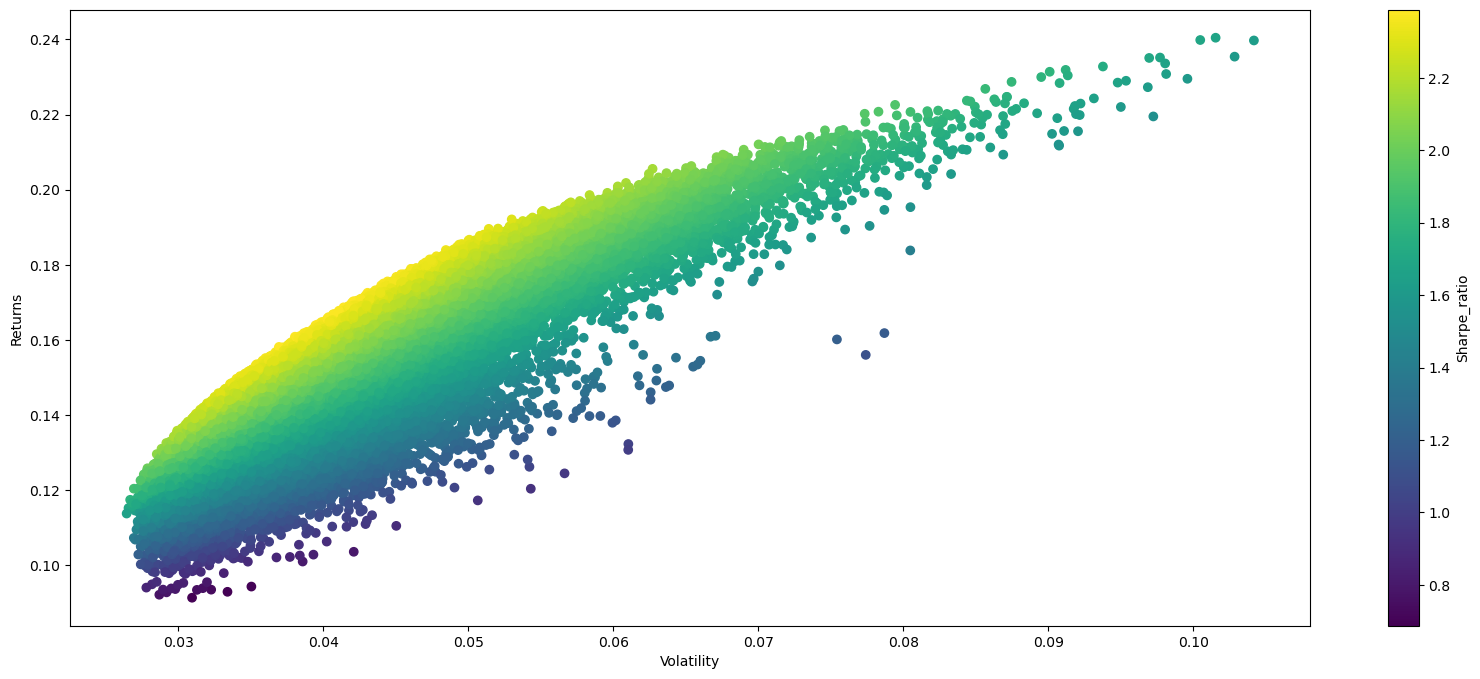

In [28]:
# Interactive plot
plt.figure(figsize=(20,8))
plt.scatter(risk,portfolio_returns,c=(portfolio_returns-risk_free_rate)/risk,cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar(label='Sharpe_ratio')